In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

import gc
import myutil

In [5]:
class lgrWrapper():
    def __init__(self):
        return
    
    def init_model(self):
        self.clf = LogisticRegression(C = 0.0001)     
        return    

    def train(self, trn_x, trn_y):
        self.clf.fit(trn_x, trn_y)

    def predict(self, x):
        result = self.clf.predict_proba(x)[:, 1]
        return result
    
    def get_coef(self):
        return self.clf.coef_.reshape(-1,1)

lgr = lgrWrapper()

In [3]:
data, test, y = myutil.get_train_test_label()

(500, 826)
(500, 826)


In [6]:
oof_preds, test_preds, importances, folds = myutil.cross_validation(data, test, y, lgr)

/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold  1 AUC : 0.632873


/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold  2 AUC : 0.645833


/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold  3 AUC : 0.498889


/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold  4 AUC : 0.530142
Fold  5 AUC : 0.635945
Full AUC score 0.565261


/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression
Index(['DAYS_EMPLOYED', 'bureau_DAYS_CREDIT_sum', 'bureau_AMT_ANNUITY_mean',
       'DAYS_LAST_PHONE_CHANGE', 'bureau_DAYS_ENDDATE_FACT_sum',
       'prev_app_AMT_DOWN_PAYMENT_mean', 'DAYS_REGISTRATION',
       'bureau_DAYS_CREDIT_ENDDATE_max', 'AMT_ANNUITY',
       'install_AMT_PAYMENT_min', 'DAYS_ID_PUBLISH',
       'bureau_AMT_CREDIT_SUM_LIMIT_mean', 'credit_bal_Average_Drawing_max',
       'prev_app_DAYS_LAST_DUE_1ST_VERSION_sum', 'install_AMT_PAYMENT_mean',
       'prev_app_AMT_APPLICATION_mean', 'credit_bal_AMT_DRAWINGS_CURRENT_sum',
       'bureau_AMT_CREDIT_SUM_OVERDUE_min',
       'bureau_AMT_CREDIT_SUM_OVERDUE_mean',
       'bureau_AMT_CREDIT_MAX_OVERDUE_min',
       'prev_app_DAYS_LAST_DUE_1ST_VERSION_max', 'install_AMT_PAYMENT_max',
       'prev_app_DAYS_LAST_DUE_sum', 'bureau_AMT_CREDIT_SUM_OVERDUE_max',
       'bureau_AMT_CREDIT_SUM_OVERDUE_sum', 'bureau_DAYS_CREDIT_min',
       'prev_app_DAYS_LAST_DUE_1ST_VERSION_mean', 'DAYS_BIRTH',
       'install_DA

/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


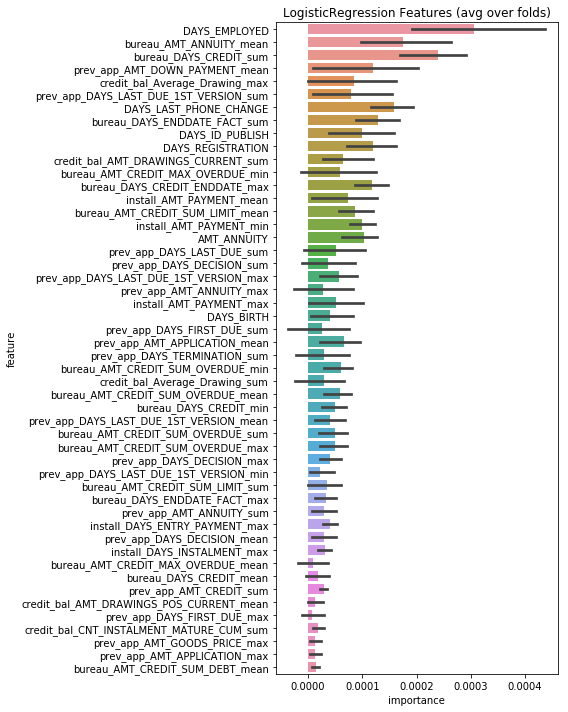

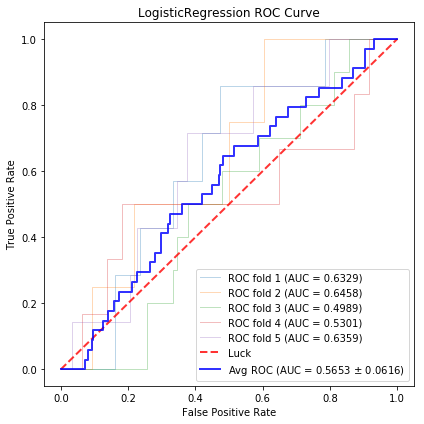

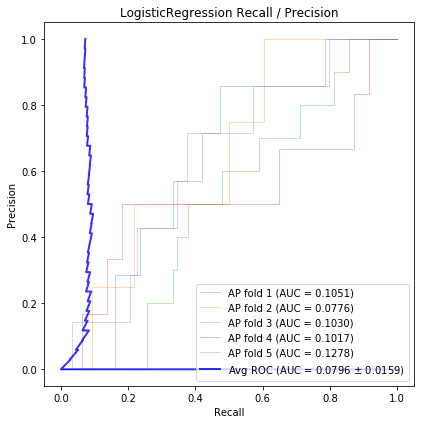

In [7]:
title = 'LogisticRegression'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title)